In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#read dataset 'df_avocado'
df_avocado = pd.read_csv('df_avocado.csv', index_col = 0)

In [4]:
#Check dataset
df_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


##  Average Price of Organic and Non-Organic
Before doing hypothesis testing, I’d like to overview the average price difference of organic and non-organic in bar plot again:

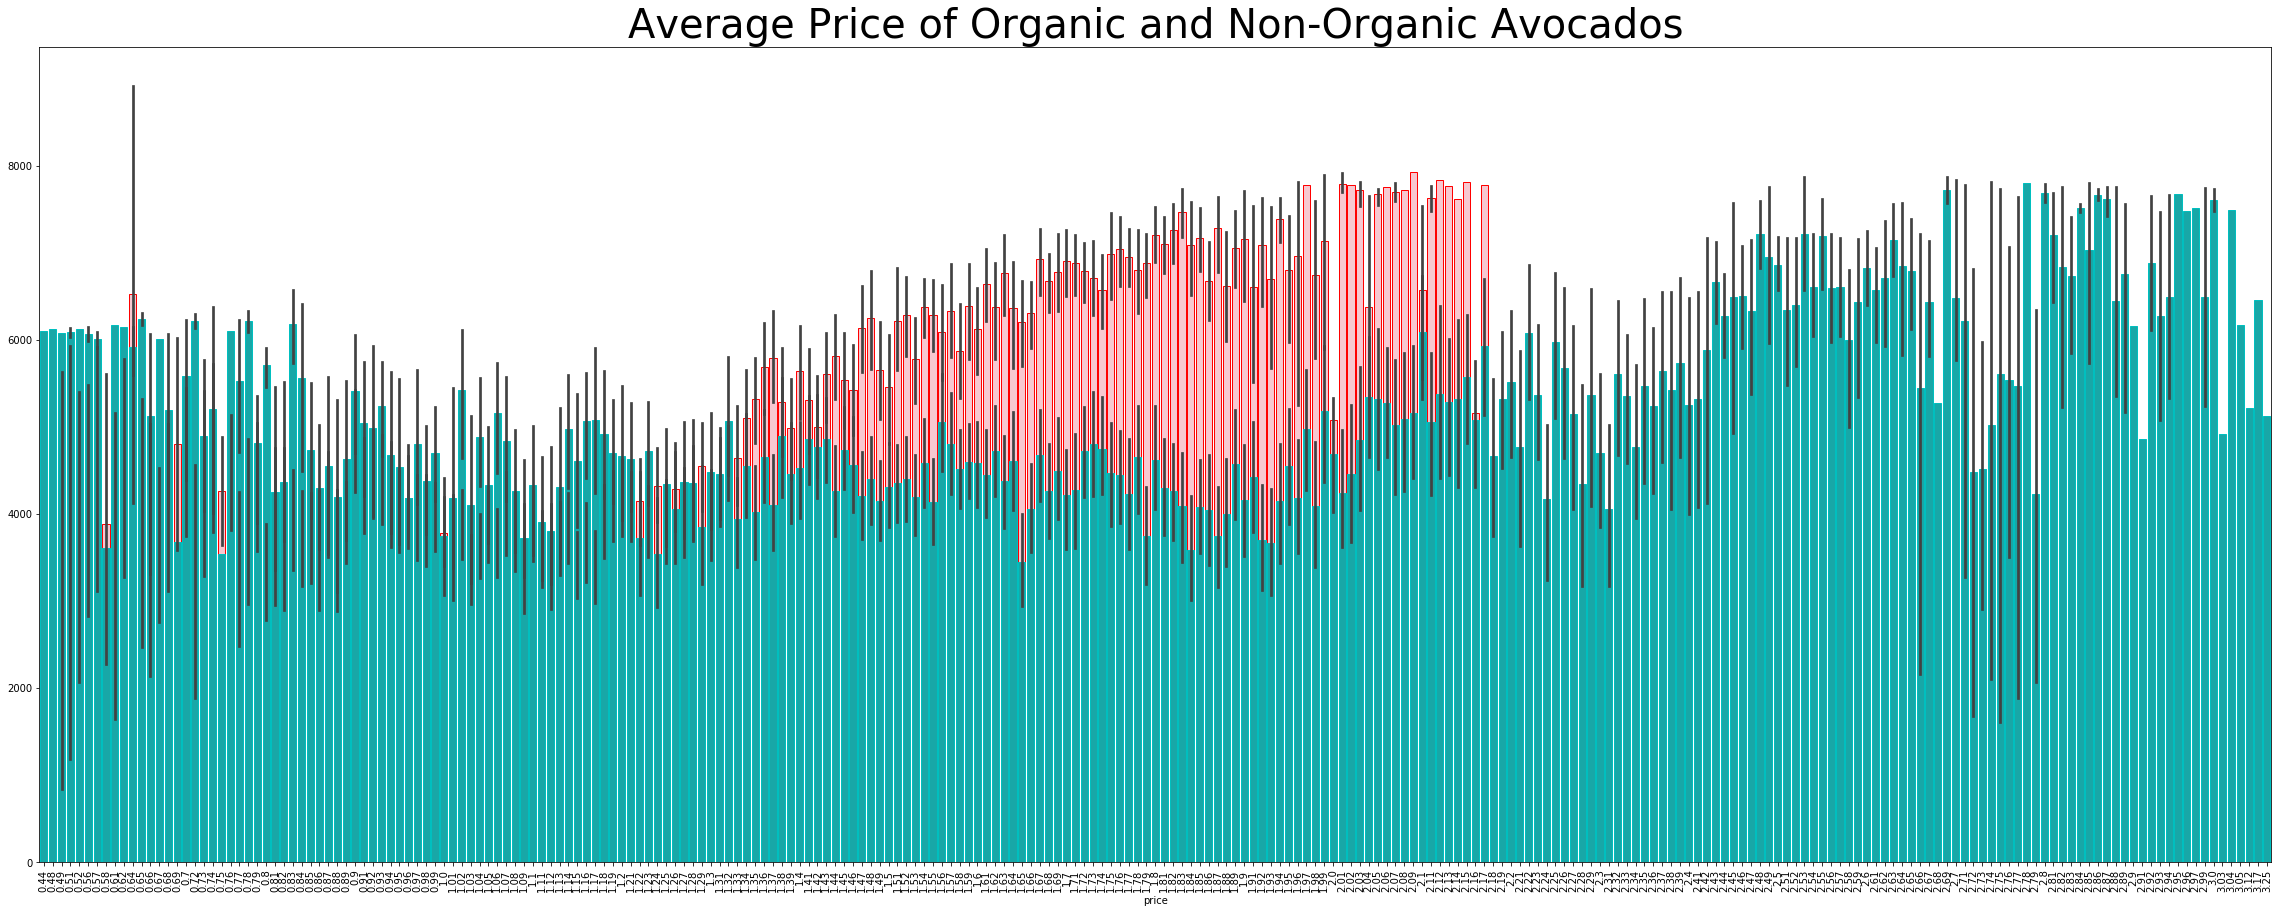

In [5]:
priceCon = df_avocado[df_avocado['type'] == 'conventional']['AveragePrice'].reset_index(name = 'price')
priceOrg = df_avocado[df_avocado['type'] == 'organic']['AveragePrice'].reset_index(name = 'price')

#Draw price of organic and non-organic
f, ax = plt.subplots(figsize = (40,15))
sns.barplot(x = priceCon.price, y = priceCon.index, data = priceCon, color = 'pink', ec ='r',label = 'Conventional')
sns.barplot(x = priceOrg.price, y = priceOrg.index, data = priceOrg, color = 'c', ec='c',label = 'organic')
plt.title('Average Price of Organic and Non-Organic Avocados', fontsize = 40)
plt.xticks(rotation = 90)
plt.show()

In this chart, it is obvious that both organic avocado and non-organic avocado have reached the highest point in price, so is price still the guiding factor for the two types of sales?
Let me do hypothesis testing to verify it.


### Hypothesis: 

H0: There is no difference in average price between organic and conventional.<br>
H1: There is a difference in average price between organic and conventional. 

In [6]:
#Select average prices of organic and conventional
price_org = df_avocado[df_avocado['type']=='organic']['AveragePrice']
price_con = df_avocado[df_avocado['type']=='conventional']['AveragePrice']
print(price_org,'\n',price_con)

11569    1.75
9593     1.49
10009    1.68
9333     1.64
10269    1.50
         ... 
17841    1.75
18057    1.42
17649    1.74
18141    1.42
17673    1.70
Name: AveragePrice, Length: 9123, dtype: float64 
 1819    1.52
2807    0.75
1195    0.85
103     1.00
1143    0.80
        ... 
8526    1.39
8850    1.32
8574    1.36
9018    0.70
8814    1.34
Name: AveragePrice, Length: 9126, dtype: float64


In [7]:
#Test with bootstrapping
bs_sample_org = np.random.choice(price_org, size = len(price_org))
bs_sample_con = np.random.choice(price_con, size = len(price_con))
print(bs_sample_org, '\n', bs_sample_con)

[2.07 2.13 1.91 ... 1.44 1.55 1.37] 
 [0.98 1.33 1.   ... 1.34 0.7  1.13]


In [8]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[len(data1):]
    perm_sample_2 = permuted_data[:len(data1)]

    return perm_sample_1, perm_sample_2

In [9]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2 )

    return perm_replicates

In [10]:
def diff_price(data1, data2):
    diff = np.mean(data1) - np.mean(data2)
    return diff

In [11]:
diff_mean = diff_price(price_org, price_con)
diff_mean

0.49595901775738493

In [12]:
perm_replicate = draw_perm_reps(bs_sample_org, bs_sample_con, diff_price, size = len(bs_sample_org))
perm_replicate

array([-0.0066414 , -0.00275735,  0.00023898, ..., -0.00230801,
        0.00292625, -0.00246802])

In [13]:
p = np.sum(perm_replicate >= diff_mean)/ len(perm_replicate)
print('P value is: ', '{:f}'.format(p))

P value is:  0.000000


In [14]:
#test 
low_perm = np.percentile(perm_replicate, 2.5)
high_perm = np.percentile(perm_replicate, 97.5)
print(low_perm, high_perm)

-0.011627752118519508 0.011823067738208291


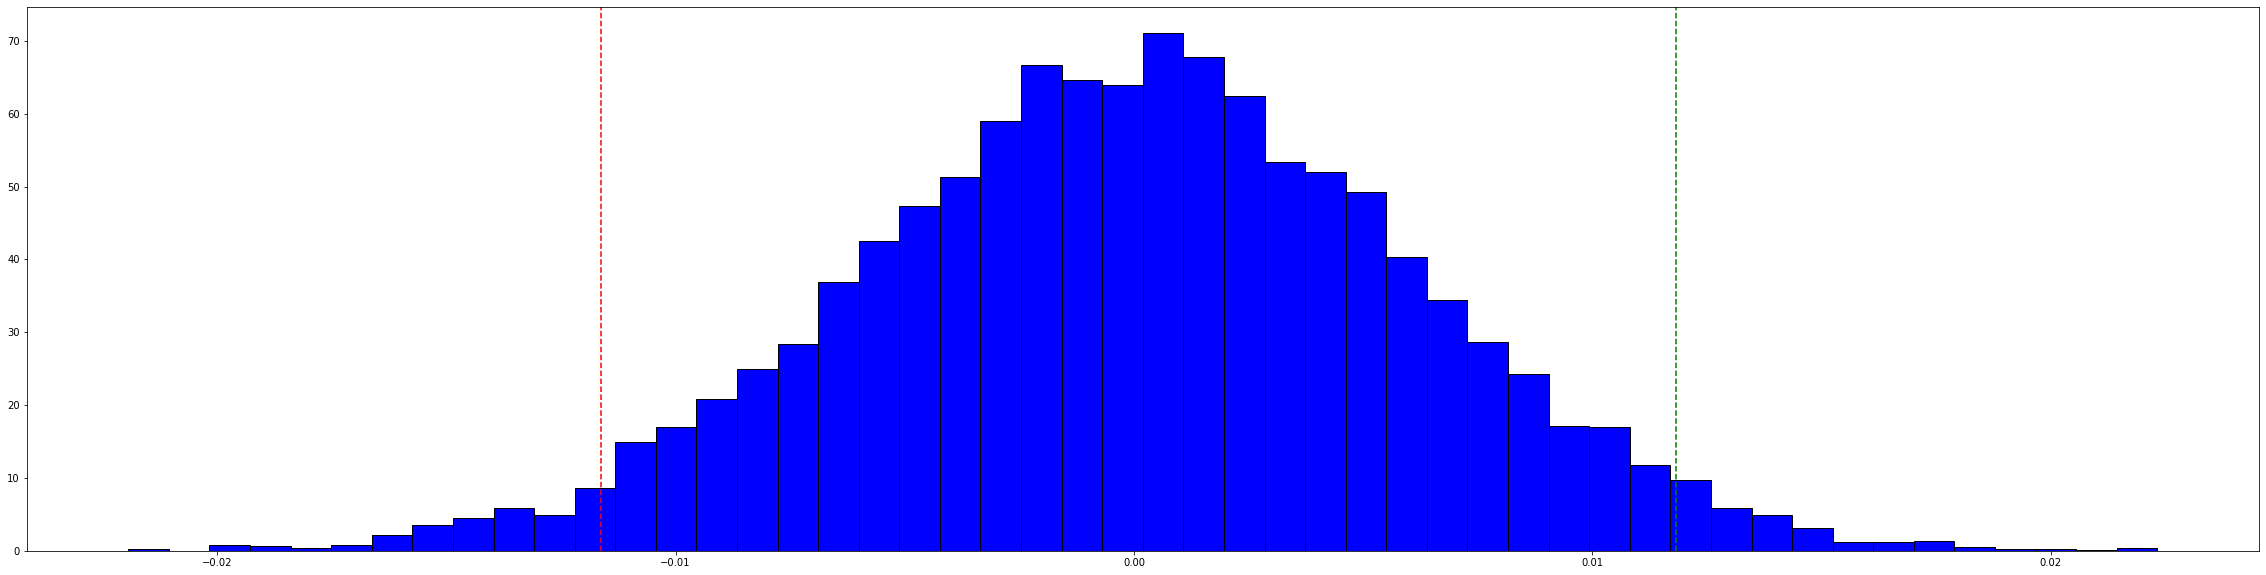

In [15]:
#Draw average price and total selling volume
f, ax = plt.subplots(figsize=(40,10))
plt.hist(perm_replicate, bins=50, density = True, color='blue', ec = 'black')
plt.xlabel = 'Different STD Between Price of Organic and Price of Conventional'
plt.ylabel = 'count'
plt.axvline(low_perm, linestyle = 'dashed', color='red')
plt.axvline(high_perm,linestyle = 'dashed',  color = 'green')
plt.show()

After test, 𝛼=0.05, p = 0.00 indecated that is no actual difference price between organic and conventional.<br>
H0 is approved.

### Ratio of 3 types Avocados Sale
Think about 3 products of avocados with different PLU, what is the ratio of each product sale of total sales?

In [16]:
# Ratio of each products being sold
ratio_4046_sold = df_avocado['4046']/df_avocado['Total Volume']
ratio_4225_sold = df_avocado['4225']/df_avocado['Total Volume']
ratio_4770_sold = df_avocado['4770']/df_avocado['Total Volume']

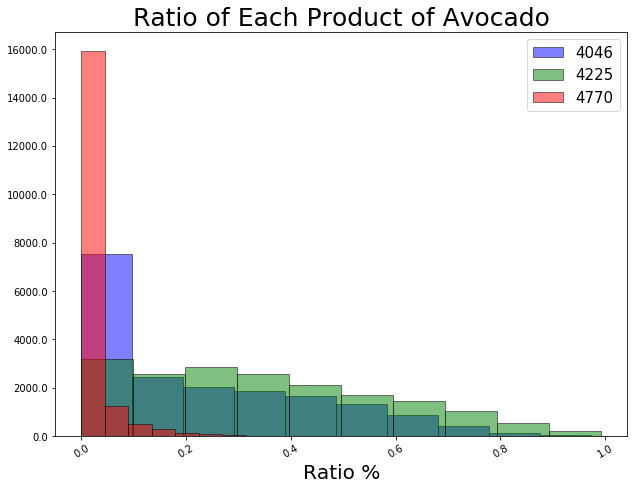

In [17]:
#Draw a plot to show ratios of three
f, ax = plt.subplots(figsize=(10, 8))

plt.hist(ratio_4046_sold, color="b", bins = 10, alpha = 0.5, label ='4046', ec = 'black')
plt.hist(ratio_4225_sold, color="g", bins = 10, alpha = 0.5, label ='4225', ec = 'black')
plt.hist(ratio_4770_sold, color="r", bins = 10, alpha = 0.5, label ='4770', ec = 'black')

ax.set_title('Ratio of Each Product of Avocado', fontsize = 25)
ax.set_xlabel('Ratio %', fontsize = 20)
# ax.set_xticklabels(['{:,.1%}'.format(x) for x in xvals], rotation = 30, size = 30)
xvals = ax.get_xticks()
ax.set_xticklabels(['{:,.2}'.format(x) for x in xvals], rotation = 30)
yvals = ax.get_yticks()
ax.set_yticklabels(yvals)
plt.legend(prop={'size':15})
f.tight_layout(pad=5.0)
plt.show()

In most of time, 4770 accounted for 0.5% of total sales.<br>
4046 and 4225 accounted average sales of total sales, ranging from 0.1% to 0.89%.

## Sales during the specified period
If avocado sales fluctuate by seasonal?
To achieve it, I will modify the "date" frame and change the date to monthly in a year and daily in a week, and merge the "total volume".

In [54]:
#Pick columns of date and total volume
volume_seasonal = df_avocado.loc[:,['Date','Total Volume']]
volume_seasonal

,Date,Total Volume
11569,2015-01-04,27365.89
9593,2015-01-04,17723.17
10009,2015-01-04,2896.72
1819,2015-01-04,54956.80
9333,2015-01-04,1505.12
...,...,...
8574,2018-03-25,908202.13
9018,2018-03-25,9010588.32
18141,2018-03-25,163496.70
17673,2018-03-25,190257.38


### Overview the sale

In [19]:
# Calculate the sum total volume yealy
total_sale = volume_seasonal.groupby(by = 'Date')['Total Volume'].sum().reset_index()
total_sale

,Date,Total Volume
0,2015-01-04,8.467434e+07
1,2015-01-11,7.855581e+07
2,2015-01-18,7.838878e+07
3,2015-01-25,7.646628e+07
4,2015-02-01,1.194532e+08
...,...,...
164,2018-02-25,1.092314e+08
165,2018-03-04,1.118449e+08
166,2018-03-11,1.114652e+08
167,2018-03-18,1.136740e+08


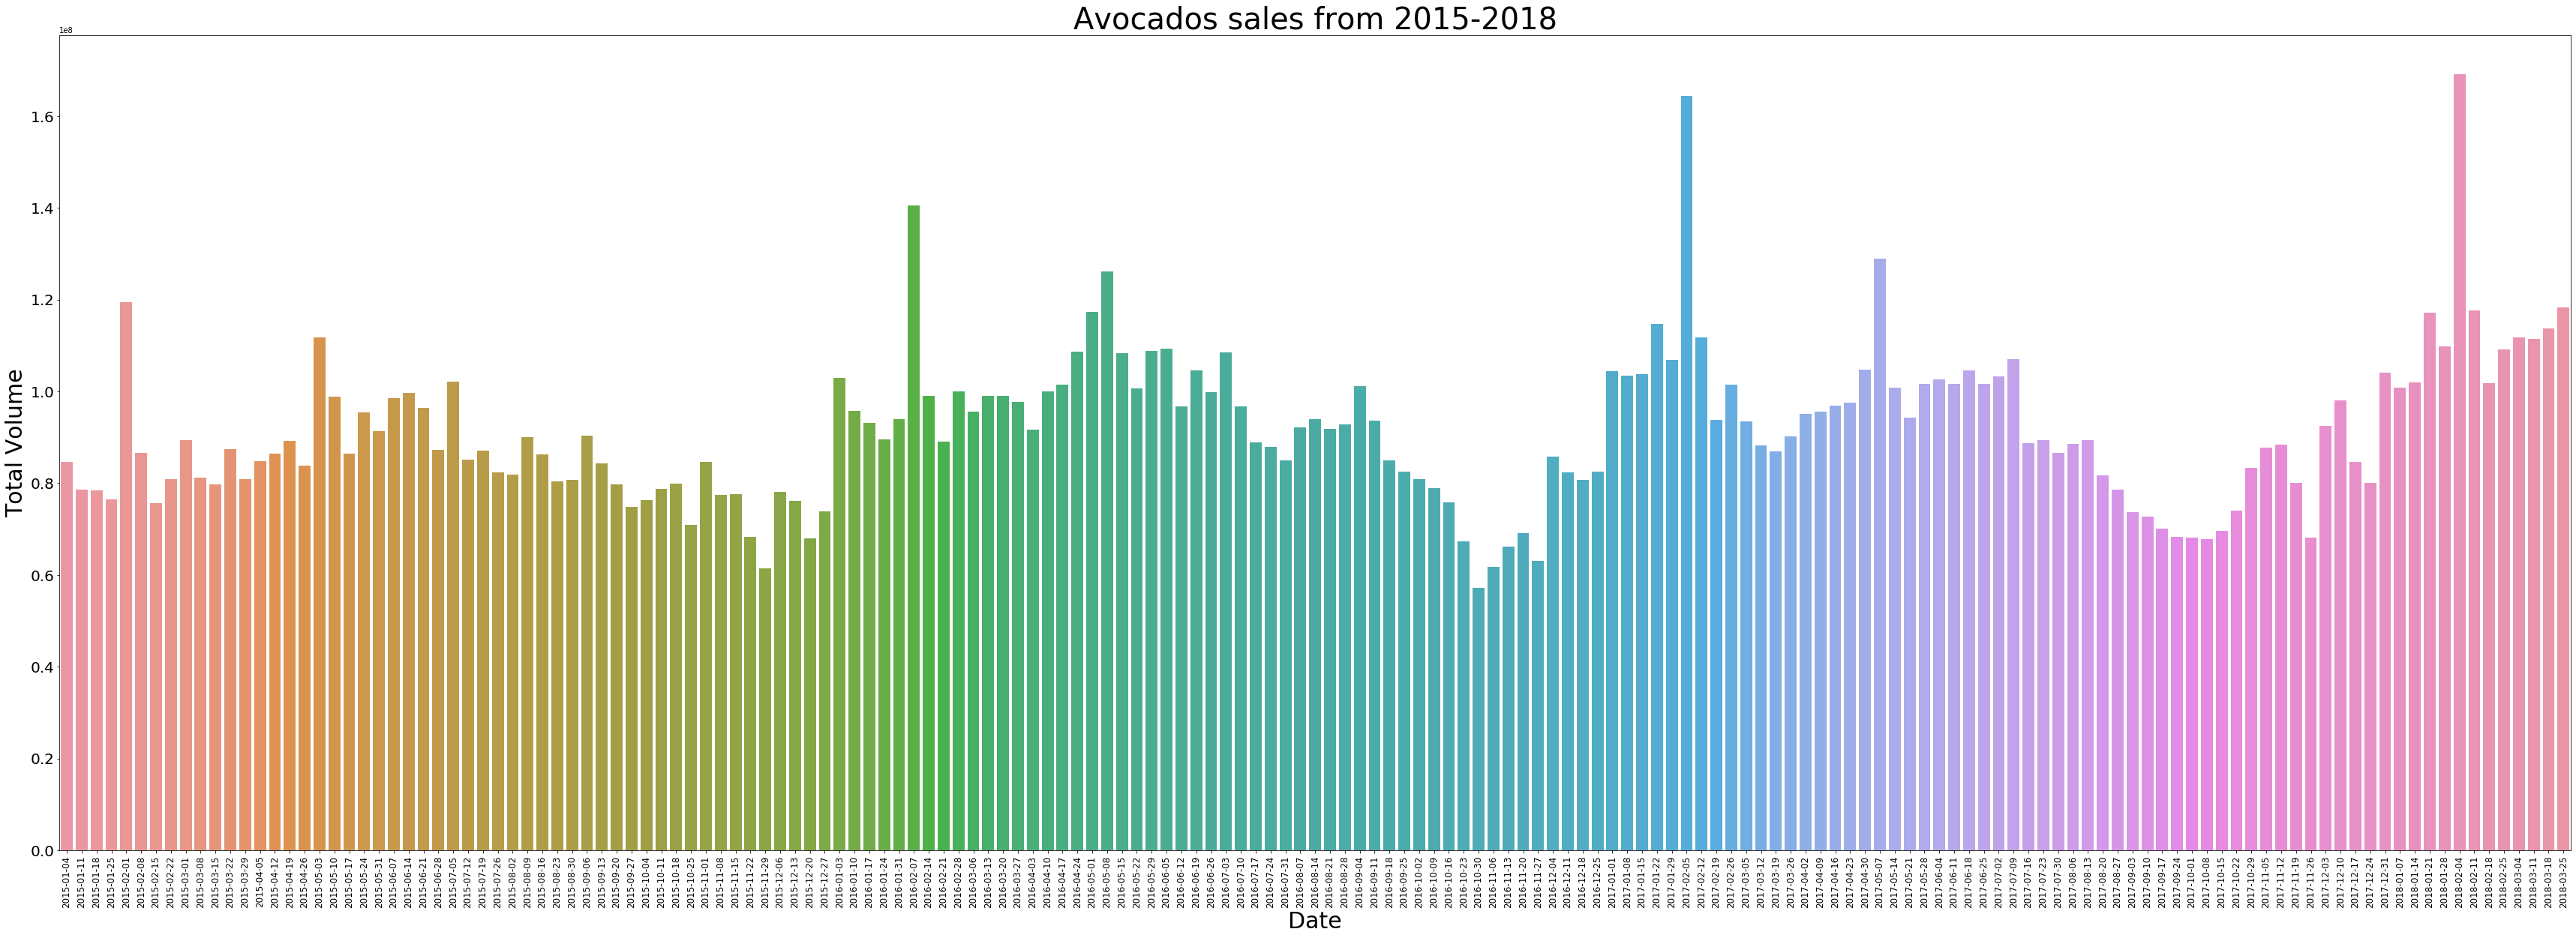

In [63]:
# #Draw a plot to show the sales change in the year
f, ax = plt.subplots(figsize=(60, 20))

sns.barplot(total_sale['Date'], total_sale['Total Volume'], data = total_sale)

plt.title('Avocados sales from 2015-2018', fontsize = 40)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 20)
ax.set_xlabel('Date', fontsize = 30)
ax.set_ylabel('Total Volume', fontsize = 30)
plt.show()

In this plot,total sales are relatively average except for a few days in February.<br>

### Sales during a month

In [21]:
#Modify formate of column 'Date' from 'y-m-d' to 'm-d'
monthly = volume_seasonal['Date'].apply(lambda x: x.split("-",2)[1])
monthly

11569    01
9593     01
10009    01
1819     01
9333     01
         ..
8574     03
9018     03
18141    03
17673    03
8814     03
Name: Date, Length: 18249, dtype: object

In [22]:
#Calculate the sum total volume by month-day
monthly_sales = volume_seasonal.groupby(by = monthly)['Total Volume'].sum().reset_index()
monthly_sales

,Date,Total Volume
0,01,1.756531e+09
1,02,1.760529e+09
2,03,1.623952e+09
3,04,1.235792e+09
4,05,1.470745e+09
5,06,1.202566e+09
6,07,1.298881e+09
7,08,1.128375e+09
8,09,9.763016e+08
9,10,1.028756e+09


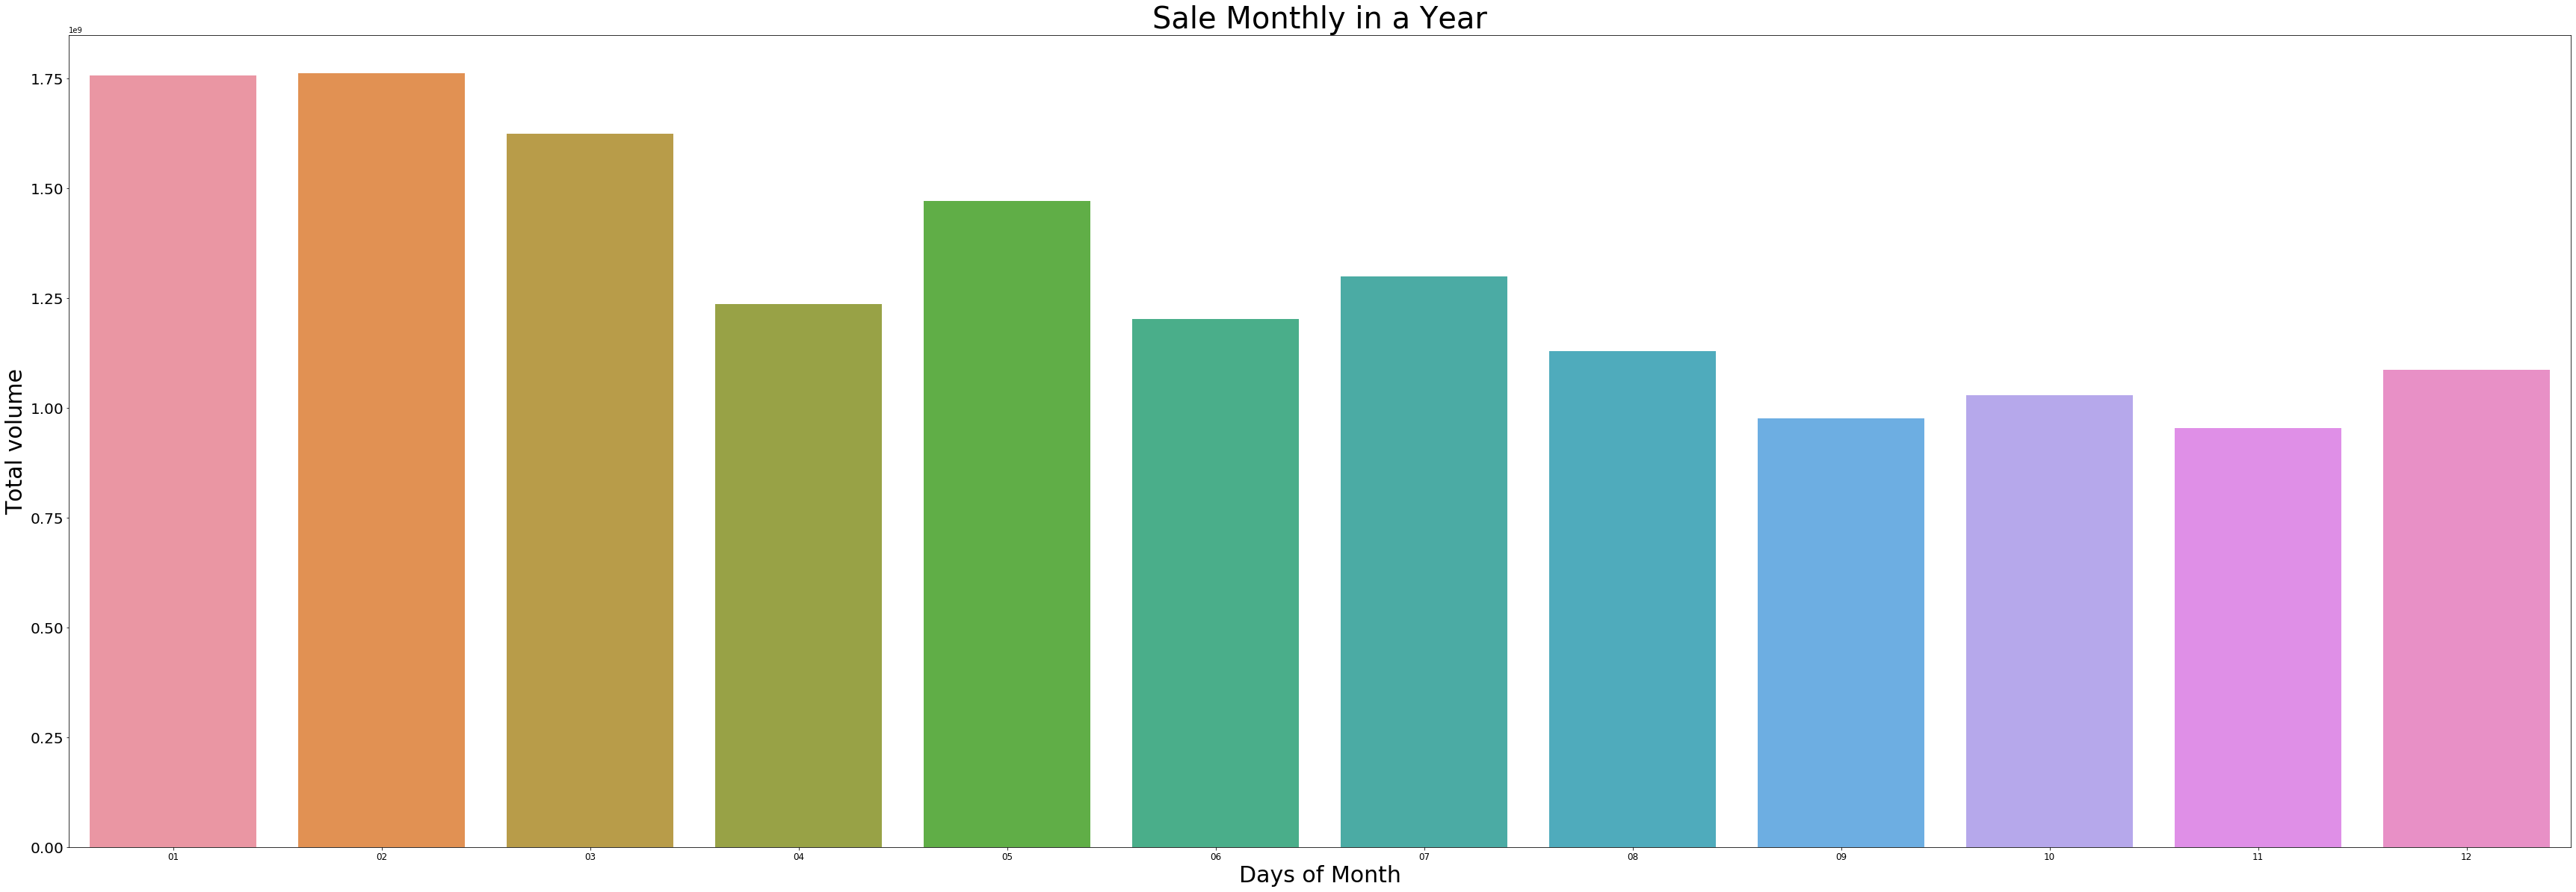

In [23]:
#Draw a plot to show the sales change monthly in the year
f, ax = plt.subplots(figsize=(60, 20))

sns.barplot(monthly_sales['Date'], monthly_sales['Total Volume'], data = monthly_sales)

plt.title('Sale Monthly in a Year', fontsize = 40)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 20)
ax.set_xlabel('Days of Month', fontsize = 30)
ax.set_ylabel('Total volume', fontsize = 30)
plt.show()

In the monthly plot, we can easy to find the highest sales volume happen in first 3 months of the year, while yearly  sales are slowly declining in waves.


### Sales during a week

In [62]:
#Modify 'Date' to 'Week Day'
weekly = volume_seasonal
weekly['Date'] = pd.to_datetime(weekly['Date'])
weekly['Week Day'] = weekly['Date'].dt.weekday_name

,Date,Total Volume,Week Day
11569,2015-01-04,27365.89,Sunday
9593,2015-01-04,17723.17,Sunday
10009,2015-01-04,2896.72,Sunday
1819,2015-01-04,54956.80,Sunday
9333,2015-01-04,1505.12,Sunday
2807,2015-01-04,758118.95,Sunday
1195,2015-01-04,2682159.95,Sunday
10269,2015-01-04,6329.83,Sunday
103,2015-01-04,435021.49,Sunday
1143,2015-01-04,317861.35,Sunday


In [60]:
weekly['Week Day'].unique()

array(['Sunday'], dtype=object)

The weekday column shows all data were collected by every Sunday of the 4 years, therefore, there is not necessary to  do weekly analysis. 